In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate intersection given two points on each line

# Algorithm to determine on which side of the robot the trajectory is located at
# => After determining the intersection between a perpendicular line to the robot's
#    orientation and every trajectory, the distance and angle can be used to determine
#    on which side of the robot the trajectory is located at

# This algorithm is necessary because the original trajectory resolution is very low

# https://en.wikipedia.org/wiki/Line%E2%80%93line_intersection

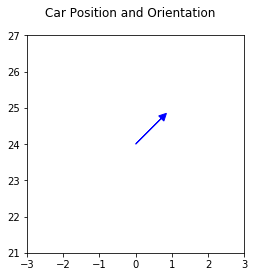

In [2]:
# Current Car Position and Orientation

current_pos = np.array([0, 24])
current_angle = 0.785398
unit_vector = [np.cos(current_angle), np.sin(current_angle)]

# Plot
fig = plt.figure()
fig.suptitle('Car Position and Orientation')
ax = fig.add_subplot(1, 1, 1)

ax.arrow(current_pos[0], current_pos[1], unit_vector[0], 
         unit_vector[1], head_width=0.2, head_length=0.2, fc='b', ec='b')

ax.set_xlim([-3, 3])
ax.set_ylim([21, 27])
ax.set_aspect('equal')

P1: [0.0, 24.0]
P2: [-0.7071092629909858, 24.7071042993734]


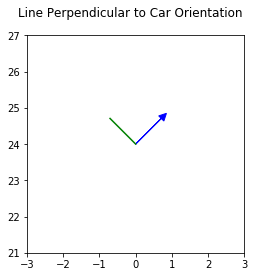

In [3]:
# Define Line Perpenticular to Car Orientation

current_angle_perp = current_angle + 1.5708
unit_vector_perp = [np.cos(current_angle_perp), np.sin(current_angle_perp)]

line1 = np.array([current_pos, current_pos+unit_vector_perp])

x1 = line1[0, 0]
y1 = line1[0, 1]

x2 = line1[1, 0]
y2 = line1[1, 1]

print(f"P1: [{x1}, {y1}]")
print(f"P2: [{x2}, {y2}]")

# Plot
fig = plt.figure()
fig.suptitle('Line Perpendicular to Car Orientation')
ax = fig.add_subplot(1, 1, 1)

ax.arrow(current_pos[0], current_pos[1], unit_vector[0], 
         unit_vector[1], head_width=0.2, head_length=0.2, fc='b', ec='b')
ax.plot(line1[:, 0], line1[:, 1], color='green')

ax.set_xlim([-3, 3])
ax.set_ylim([21, 27])
ax.set_aspect('equal')

P3: [-2.5, 24.5312]
P4: [2.5, 24.5312]


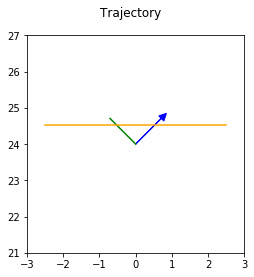

In [4]:
# Line defined by Trajectory: 2 closest points to Car Position

line2 = np.array([[-2.5, 24.5312], [2.5, 24.5312]])

x3 = line2[0, 0]
y3 = line2[0, 1]

x4 = line2[1, 0]
y4 = line2[1, 1]

print(f"P3: [{x3}, {y3}]")
print(f"P4: [{x4}, {y4}]")

# Plot
fig = plt.figure()
fig.suptitle('Trajectory')
ax = fig.add_subplot(1, 1, 1)

ax.arrow(current_pos[0], current_pos[1], unit_vector[0], 
         unit_vector[1], head_width=0.2, head_length=0.2, fc='b', ec='b')
ax.plot(line1[:, 0], line1[:, 1], color='green')
ax.plot(line2[:, 0], line2[:, 1], color='orange')

ax.set_xlim([-3, 3])
ax.set_ylim([21, 27])
ax.set_aspect('equal')

[-0.5312037288327413, 24.5312]


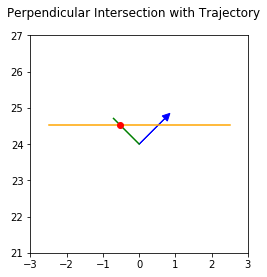

In [5]:
# Compute Line Intersection

################################
dx1 = x1 - x2
dx2 = x3 - x4

dy1 = y1 - y2
dy2 = y3 - y4

dm1 = x1*y2 - y1*x2
dm2 = x3*y4 - y3*x4

D = dx1*dy2 - dy1*dx2

px = (dm1*dx2 - dm2*dx1) / D
py = (dm1*dy2 - dm2*dy1) / D
################################

print(f"[{px}, {py}]")

# Plot
fig = plt.figure()
fig.suptitle('Perpendicular Intersection with Trajectory')
ax = fig.add_subplot(1, 1, 1)

ax.arrow(current_pos[0], current_pos[1], unit_vector[0], 
         unit_vector[1], head_width=0.2, head_length=0.2, fc='b', ec='b')
ax.plot(line1[:, 0], line1[:, 1], color='green')
ax.plot(line2[:, 0], line2[:, 1], color='orange')
ax.plot(px, py, 'ro')

ax.set_xlim([-3, 3])
ax.set_ylim([21, 27])
ax.set_aspect('equal')